In [11]:
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
from pandas import DataFrame
from matplotlib import pyplot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pandas.plotting import autocorrelation_plot

In [12]:
df = pd.read_csv("groupeddf.csv")
df = df.dropna()

uniqueVals = df["Code"].unique()  
len(uniqueVals)
df=df.set_index("Code") 

In [13]:
#daily basis
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

In [14]:
def arima_model(train, test):
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(6,1 ,0))
        model_fit = model.fit(disp=0)
        #print(model_fit.summary())
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat[0])
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    return predictions

8KMILES
predicted=0.856405, expected=0.070751
predicted=-0.111431, expected=0.045070
predicted=-0.018574, expected=0.017832
predicted=-0.028968, expected=0.000000
predicted=0.159123, expected=0.013411
predicted=0.107640, expected=0.035811
predicted=-0.064014, expected=0.055506
predicted=0.062586, expected=0.052737
predicted=0.052561, expected=0.188346
predicted=0.202602, expected=0.237633
predicted=0.251013, expected=0.192865
predicted=0.196650, expected=0.131742
predicted=0.108771, expected=0.363007
predicted=0.373799, expected=0.604142
predicted=0.660801, expected=0.670939
predicted=0.709656, expected=0.624973
predicted=0.607321, expected=0.634113
predicted=0.608449, expected=0.650712
predicted=0.654046, expected=0.750556
predicted=0.787878, expected=0.688515
predicted=0.687837, expected=0.727853
predicted=0.734617, expected=0.739941
predicted=0.739055, expected=0.914248
predicted=0.947907, expected=0.867250
predicted=0.874470, expected=0.923058
predicted=0.929507, expected=0.916419


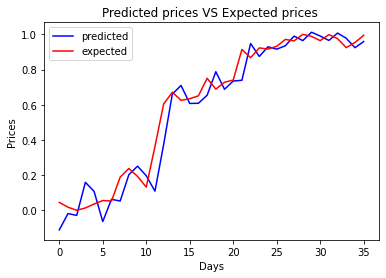

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
for company in uniqueVals[1:2]:
    data=(df.loc[company,:]).reset_index()
    data['Price'] = data['Close']
    Quantity_date = data[['Price','Date']]
    Quantity_date.index = Quantity_date['Date'].map(lambda x: parser(x))
    Quantity_date['Price'] = Quantity_date['Price'].map(lambda x: float(x))
    Quantity_date = Quantity_date.fillna(Quantity_date.bfill())
    Quantity_date = Quantity_date.drop(['Date'],axis =1)
    #autocorrelation_plot(Quantity_date)
    print(company)
    
    quantity = Quantity_date.values
    size = int(len(quantity) * 0.80)
    #train, test = train_test_split(quantity, test_size=0.20, random_state=42)
    train, test = quantity[0:size], quantity[size:len(quantity)]
    #print(type(test),type(test1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    train = scaler.fit_transform(train)
    test = scaler.fit_transform(test)
    predictions = arima_model(train, test)
    error = math.sqrt(mean_squared_error(test[1:], predictions[1:]))
    print('Test RMSE: %.3f' % error)
    plt.plot(predictions[1:], color='blue',label='predicted')
    plt.plot(test[1:],color='red',label='expected' )
    plt.xlabel("Days")
    plt.ylabel("Prices")
    plt.legend(loc=0)
    plt.title('Predicted prices VS Expected prices ')
    plt.show()